# Analisis Setimen pada Permendikbud dengan menggunakan RNN (LSTM)

Nama Peserta:
- Ferdy Nanda Riza
- Shabrina Novaindah Dwiyamti
- Nalurisa Izma Mardiana

Universitas Host: Universitas Telkom

Kelas: TelU-04

Kelompok: 3


### Import dataset yang diperlukan

In [ ]:
import pandas as pd

In [ ]:
# Import data
twit=pd.read_csv('tweets.csv')
positive=pd.read_csv('kamus/positive_keyword.txt',header=None)
positive.columns=['words']
negative=pd.read_csv('kamus/negative_keyword.txt',header=None)
negative.columns=['words']
stop_words=pd.read_csv('kamus/stopword.txt',header=None)
stop_words.columns=['words']

### Import library yang diperlukan

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import *
stemmer = PorterStemmer()

#### Preproses data dengan memecah kalimat perkata, menghapus stopword, dan menghapus angka pada teks

In [ ]:
#preprocess function 
stem_words=lambda x: stemmer.stem(x)
break_into_words = lambda x : re.findall("[a-zA-Z0-9]+", x)
skip_stop_words = lambda x: [w for w in x if w not in list(stop_words['words'])]
skip_numeric = lambda x : [w for w in x if not w.isnumeric()]

In [ ]:
#apply pre-processing steps
processed_text=twit['Tweets'].map(break_into_words)\
        .map(skip_stop_words)\
        .map(skip_numeric)

#### Menambahkan hasil preproses ke dalam dataframe

In [ ]:
twit['processed']=processed_text

### Mengklasifikasi tweet berdasarkan jumlah kata positif atau negatif

In [ ]:
#count number of positive words
positive_words_count=processed_text.map(lambda x: len([w for w in x if w in list(positive['words'])]))
#count number of negative words
negative_words_count=processed_text.map(lambda x: len([w for w in x if w in list(negative['words'])]))
twit['positive']=positive_words_count
twit['negative']=negative_words_count

In [ ]:
twit['sentiment_score_1']=twit['positive']-twit['negative']


In [ ]:
twit.head()

,Tweets,processed,positive,negative,sentiment_score_1
0,bukan nya konteksnya kekerasan seksual yah klo...,"[konteksnya, kekerasan, seksual, yah, kekerasa...",0,3,-3
1,tagarnya aja tolak permendikbud ada gt mereka ...,"[tagarnya, permendikbud, gt, naikan, tagar, re...",0,0,0
2,tolak permendikbud katanya,[permendikbud],0,0,0
3,berikut alasan disahkannya permendikbud penang...,"[disahkannya, permendikbud, penanganan, kekera...",0,1,-1
4,kpi somasi nadiem terkait permendikbud pencega...,"[kpi, somasi, nadiem, permendikbud, pencegahan...",0,2,-2


In [ ]:
import numpy as np

In [ ]:
bins = [-np.inf, -1, 1, np.inf]
names = ['negatif', 'netral', 'positif']

twit['kategori'] = pd.cut(twit['sentiment_score_1'], bins, labels=names)
twit.head()

,Tweets,processed,positive,negative,sentiment_score_1,kategori
0,bukan nya konteksnya kekerasan seksual yah klo...,"[konteksnya, kekerasan, seksual, yah, kekerasa...",0,3,-3,negatif
1,tagarnya aja tolak permendikbud ada gt mereka ...,"[tagarnya, permendikbud, gt, naikan, tagar, re...",0,0,0,netral
2,tolak permendikbud katanya,[permendikbud],0,0,0,netral
3,berikut alasan disahkannya permendikbud penang...,"[disahkannya, permendikbud, penanganan, kekera...",0,1,-1,negatif
4,kpi somasi nadiem terkait permendikbud pencega...,"[kpi, somasi, nadiem, permendikbud, pencegahan...",0,2,-2,negatif


In [ ]:
twit.sort_values('sentiment_score_1')

,Tweets,processed,positive,negative,sentiment_score_1,kategori
379,la ini kita emang lg ngomingin permendikbud tt...,"[la, emang, ngomingin, permendikbud, kekerasan...",0,8,-8,negatif
2751,makian khas yg digunakan perundung penentang ...,"[makian, perundung, penentang, permendikbud, a...",0,8,-8,negatif
3248,tuh arti korban dalam kbbidalam konteks permen...,"[korban, kbbidalam, konteks, permendikbud, dim...",0,8,-8,negatif
1336,demi menutupi kasus isu bisnis pcr isu permend...,"[menutupi, kasus, isu, pcr, isu, permendikbud,...",0,8,-8,negatif
928,isu bisnis pcr isu permendikbud no isu korups...,"[isu, pcr, isu, permendikbud, isu, korupsi, is...",0,7,-7,negatif
...,...,...,...,...,...,...
2153,bagi negara demokrasi terbesar ketiga di dunia...,"[negara, demokrasi, ketiga, dunia, indonesia, ...",3,0,3,positif
3665,alhamdulillah semoga dengan adanya niat baik d...,"[alhamdulillah, niat, pemimpin, tulus, melindu...",3,0,3,positif
1497,uu pendidikan tinggi ini disebutkan di konside...,"[pendidikan, disebutkan, konsiderans, permendi...",3,0,3,positif
2603,kalau permendikbud nya tidak dihargai artinya ...,"[permendikbud, dihargai, artinya, loe, jabatan...",4,0,4,positif


### Eksplorasi Data

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='kategori', ylabel='count'>

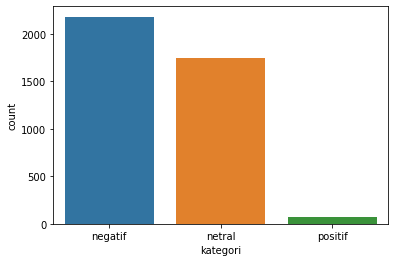

In [ ]:
sns.countplot(data=twit, x='kategori')

In [ ]:
(twit['kategori']=='positif').sum()

72

In [ ]:
data = twit[['kategori','Tweets']]

In [ ]:
import re
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from keras.models import Sequential, load_model
from keras.layers import Dense, LSTM, Embedding, Dropout
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

<AxesSubplot:ylabel='Frequency'>

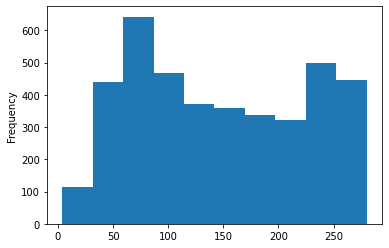

In [ ]:
data['Tweets'].str.len().plot.hist()

### Tokenisasi teks

In [ ]:
tokenizer = Tokenizer(num_words=5000, split=" ")
tokenizer.fit_on_texts(data['Tweets'].values)

X = tokenizer.texts_to_sequences(data['Tweets'].values)
X = pad_sequences(X) # padding our text vector so they all have the same length
X[:5]

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,   35,   87, 1155,    9,    8,  665,  139,    9,  172,   44,
          41,  382,  190,  354,   87,  197,  164, 1537,  124,  304,   23,
        4596,  487,    1,  138,    9, 1537,  215,  304,  382,  122, 1759,
          15,    6,  197,  164,   87],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0, 4597,   29,  267,    1,    7,  527,   47,    2, 4598,
        1538,   10,   69,  286, 1538],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,  267,    1,  5

### Membuat model

In [ ]:
model = Sequential()
model.add(Embedding(5000, 256, input_length=X.shape[1]))
model.add(Dropout(0.3))
model.add(LSTM(256, return_sequences=True, dropout=0.3, recurrent_dropout=0.2))
model.add(LSTM(256, dropout=0.3, recurrent_dropout=0.2))
model.add(Dense(3, activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 49, 256)           1280000   
_________________________________________________________________
dropout (Dropout)            (None, 49, 256)           0         
_________________________________________________________________
lstm (LSTM)                  (None, 49, 256)           525312    
_________________________________________________________________
lstm_1 (LSTM)                (None, 256)               525312    
_________________________________________________________________
dense (Dense)                (None, 3)                 771       
Total params: 2,331,395
Trainable params: 2,331,395
Non-trainable params: 0
_________________________________________________________________


In [ ]:
y = pd.get_dummies(data['kategori']).values
[print(data['kategori'][i], y[i]) for i in range(0,5)]

negatif [1 0 0]
netral [0 1 0]
netral [0 1 0]
negatif [1 0 0]
negatif [1 0 0]


[None, None, None, None, None]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Training model

In [ ]:
batch_size = 32
epochs = 8

model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=2)

Epoch 1/8
100/100 - 265s - loss: 0.6639 - accuracy: 0.6866
Epoch 2/8
100/100 - 256s - loss: 0.3677 - accuracy: 0.8637
Epoch 3/8
100/100 - 270s - loss: 0.1982 - accuracy: 0.9356
Epoch 4/8
100/100 - 282s - loss: 0.1015 - accuracy: 0.9650
Epoch 5/8
100/100 - 281s - loss: 0.0721 - accuracy: 0.9747
Epoch 6/8
100/100 - 281s - loss: 0.0364 - accuracy: 0.9887
Epoch 7/8
100/100 - 284s - loss: 0.0448 - accuracy: 0.9847
Epoch 8/8
100/100 - 300s - loss: 0.0252 - accuracy: 0.9922


In [ ]:
model.save('sentiment_analysiss.h5')

### Testing model

In [ ]:
predictions = model.predict(X_test)

[print(data['Tweets'][i], predictions[i], y_test[i]) for i in range(0, 5)]

bukan nya konteksnya kekerasan seksual yah klo kekerasan memang tanpa persetujuan namun jika konteks nya tindakan asusila rasanya baru pas untuk perimbangan sehingga permendikbud terkait kekerasan rasanya sdh pas namun perlu diperkuat dengan yang tindakan asusila nya [9.995315e-01 4.308745e-04 3.763663e-05] [1 0 0]
tagarnya aja tolak permendikbud ada gt mereka yg naikan tagar itu buat revisi tagar [2.9454863e-04 9.9957997e-01 1.2545697e-04] [0 1 0]
tolak permendikbud katanya [9.9913448e-01 7.2477903e-04 1.4083336e-04] [1 0 0]
berikut alasan disahkannya permendikbud penanganan kekerasan seksual [0.12895325 0.8693155  0.00173125] [0 1 0]
kpi somasi nadiem terkait permendikbud pencegahan dan penanganan kekerasan seksual terkiniid terkinidotid makassarterkiniid makassarterkinidotid [3.3819745e-04 9.9949443e-01 1.6746379e-04] [0 1 0]


[None, None, None, None, None]

In [ ]:
pos_count, neu_count, neg_count = 0, 0, 0
real_pos, real_neu, real_neg = 0, 0, 0
for i, prediction in enumerate(predictions):
    if np.argmax(prediction)==2:
        pos_count += 1
    elif np.argmax(prediction)==1:
        neu_count += 1
    else:
        neg_count += 1
    
    if np.argmax(y_test[i])==2:
        real_pos += 1
    elif np.argmax(y_test[i])==1:    
        real_neu += 1
    else:
        real_neg +=1

print('Positive predictions:', pos_count)
print('Neutral predictions:', neu_count)
print('Negative predictions:', neg_count)
print('Real positive:', real_pos)
print('Real neutral:', real_neu)
print('Real negative:', real_neg)

Positive predictions: 2
Neutral predictions: 317
Negative predictions: 481
Real positive: 11
Real neutral: 359
Real negative: 430
